# Quantum Counting em Computação Quântica

Quantum Counting é um algoritmo quântico projetado para estimar o número de soluções para um problema em um banco de dados não ordenado de forma mais eficiente do que algoritmos clássicos. Vamos explicar o funcionamento do Quantum Counting, incluindo a parte matemática.

## Etapas do Quantum Counting

O Quantum Counting envolve as seguintes etapas:

### 1. Oráculo de Contagem

- O primeiro passo é criar um oráculo que pode verificar se um item no banco de dados é uma solução para o problema.
- Esse oráculo é usado para marcar as soluções no banco de dados.

### 2. Transformada de Fourier Quântica

- O Quantum Counting faz uso da Transformada de Fourier Quântica (QFT), que é aplicada aos qubits do banco de dados.
- A QFT gera uma superposição dos estados que representam todas as possíveis contagens de soluções.
- A fase do estado correspondente a uma contagem de soluções é uma função do ângulo no espaço de fase da QFT.

### 3. Medição

- Após a aplicação da QFT, realizamos medições nos qubits do banco de dados.
- As medições colapsam a superposição de estados, e o resultado é uma estimativa da contagem de soluções no banco de dados.

## Matemática do Quantum Counting

A parte matemática do Quantum Counting envolve a aplicação da Transformada de Fourier Quântica (QFT), que é uma operação complexa em espaço de fase. O resultado da QFT é uma superposição de estados, onde cada estado está associado a uma contagem possível de soluções.

A estimativa final da contagem é obtida através da medição dos qubits do banco de dados após a aplicação da QFT. A probabilidade de medir um estado específico está relacionada à sua fase no espaço de fase da QFT.

## Aplicações

O Quantum Counting é uma técnica essencial em algoritmos quânticos de busca, como o algoritmo de Grover. Ele é usado para acelerar a busca em grandes bancos de dados não ordenados, fornecendo estimativas rápidas do número de soluções.

## Conclusão

O Quantum Counting é uma técnica quântica poderosa para estimar o número de soluções em um banco de dados não ordenado. Ele faz uso da Transformada de Fourier Quântica e medições para fornecer estimativas eficientes. Esta técnica é fundamental para o desempenho de algoritmos quânticos de busca.

Espero que esta explicação tenha esclarecido o funcionamento do Quantum Counting, incluindo a parte matemática envolvida.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
import qiskit
from qiskit import QuantumCircuit, transpile, Aer

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
# Essa função define o operador de Grover que é usado no algoritmo. 
# Ele cria um operador Grover com um oráculo que tem 5/16 soluções corretas e repete o operador várias vezes com base em n_iterations
def grover_operator(n_iterations):
    """Grover iteration circuit for oracle with 5/16 solutions
        Args:
            n_iterations (int): number of times to repeat the circuit
        Returns:
            Gate that implements n_iterations of the Grover operator
    """
    from qiskit.circuit.library import Diagonal, GroverOperator
    oracle = Diagonal([1,1,-1,1,1,1,1,-1,1,1,-1,-1,1,1,-1,1])
    grover_it = GroverOperator(oracle).repeat(n_iterations).to_gate()
    grover_it.label = f"Grover$^{n_iterations}$"
    return grover_it

A QFT† é a Transformada de Fourier Quântica inversa, que será aplicada ao final do circuito.

In [3]:
from qiskit.circuit.library import QFT
qft_dagger = QFT(4, inverse=True).to_gate()
qft_dagger.label = "QFT†" # A QFT† é a Transformada de Fourier Quântica inversa, que será aplicada ao final do circuito.

In [4]:
# Um circuito quântico qc é criado com um total de n+t qubits (qubits de busca e qubits de contagem) e t bits clássicos.
t = 4   # no. of counting qubits
n = 4   # no. of searching qubits
qc = QuantumCircuit(n+t, t) # Circuit with n+t qubits and t classical bits

In [5]:
# Todos os qubits (tanto os de busca quanto os de contagem) são inicializados no estado |+> usando a porta Hadamard (h).
for qubit in range(t+n):
    qc.h(qubit)

In [6]:
# O código executa iterações controladas do operador de Grover com um aumento exponencial no número de iterações.
n_iterations = 1
for qubit in range(t):
    cgrit = grover_operator(n_iterations).control()
    qc.append(cgrit, [qubit] + list(range(t, n+t)))
    n_iterations *= 2

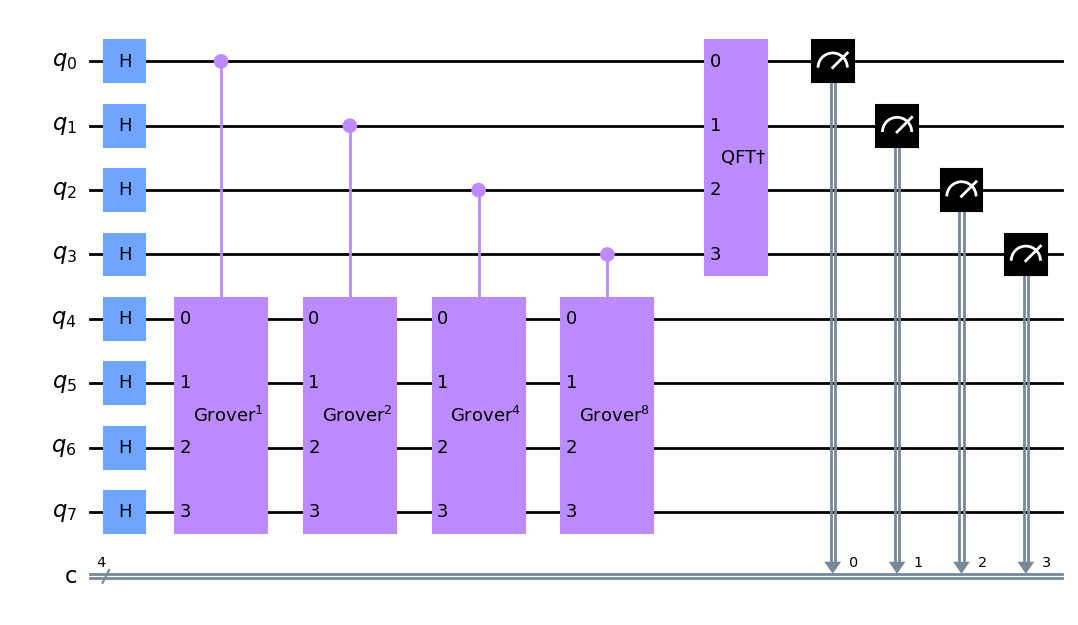

In [7]:
# A QFT† inversa é aplicada aos qubits de contagem.
qc.append(qft_dagger, range(t))

# Os qubits de contagem são medidos, e os resultados são armazenados nos bits clássicos correspondentes.
qc.measure(range(t), range(t))

# Display the circuit
qc.draw(fold=-1)

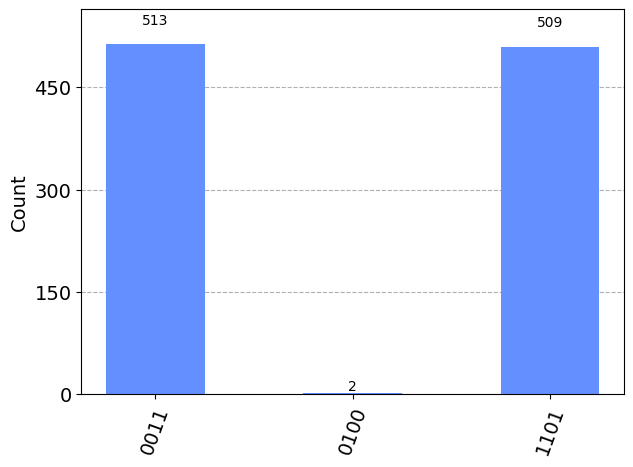

In [8]:
# Execute and see results
sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, sim)
job = sim.run(transpiled_qc)
hist = job.result().get_counts()
plot_histogram(hist)

In [9]:
measured_str = max(hist, key=hist.get)

In [10]:
measured_int = int(measured_str, 2)
print("Register Output = %i" % measured_int)

Register Output = 3


In [11]:
theta = (measured_int/(2**t))*math.pi*2
print("Theta = %.5f" % theta)

Theta = 1.17810


In [12]:
N = 2**n
M = N * (math.sin(theta/2)**2)
print(f"No. of Solutions = {M:.1f}")

No. of Solutions = 4.9


In [13]:
m = t - 1 # Upper bound: Will be less than this 
err = (math.sqrt(2*M*N) + N/(2**(m+1)))*(2**(-m))
print("Error < %.2f" % err)

Error < 1.70


In [14]:
# Essa função calcula o número de soluções corretas e fornece uma estimativa de erro.
def calculate_M(measured_int, t, n):
    """For Processing Output of Quantum Counting"""
    # Calculate Theta
    theta = (measured_int/(2**t))*math.pi*2
    print("Theta = %.5f" % theta)
    # Calculate No. of Solutions
    N = 2**n
    M = N * (math.sin(theta/2)**2)
    print(f"No. of Solutions = {M:.1f}")
    # Calculate Upper Error Bound
    m = t - 1 #Will be less than this (out of scope) 
    err = (math.sqrt(2*M*N) + N/(2**(m+1)))*(2**(-m))
    print("Error < %.2f" % err)

In [15]:
measured_int = 12  # Valor medido
t = 4  # Número de qubits de contagem
n = 4  # Número de qubits de busca

# Chamando a função calculate_M
calculate_M(measured_int, t, n)

Theta = 4.71239
No. of Solutions = 8.0
Error < 2.12
